In [1]:

bootstrapping = {
    'fras1': {'tenor': 0.166666666666667, 'rate1': 0.000867049000678135, 'rate2': 0.0016297895938788606},
    'fras2L': { 'tenor': 0.5, 'rate1': -0.008796091880796369, 'rate2': 0 },
    'fras3': { 'tenor': 0.3333333333333333, 'rate1': -0.0030367305713355276, 'rate2': 0.00433663562121712 },
    'tenor': 0.5
     }

In [2]:
from math import log,exp
def bootstrap(fras1, fras2L, fras3, tenor): 
    curve = ['','','','','','','','']
    """Libor 6M_6X12"""
    """Libor"""
    df6 = 1 / (1 + tenor * fras2L['rate1'])
    T6 = fras2L['tenor']
    r6 = -log(df6) / T6
    curve[2] = { 'tenor': T6, 'r': r6 }
    """ 12M point via 6X12"""
    T12 = T6 + tenor
    r12 = - log(df6 / (1 + tenor * fras2L['rate2'])) / (T12)
    curve[5] = { 'tenor': T12, 'r': r12 }
    """FRA 2X8_8X14"""
    DF2 = exp(-r6 * fras1['tenor'])
    T8 = fras1['tenor'] + tenor
    DF8 = exp(-(r6 + (T8 - T6) * (r12 - r6) / (T12 - T6)) * T8)

    T14 = fras1['tenor'] + 2 * tenor
    DF14 = exp(-r12 * T14)

    dL28 = 1 + tenor * fras1['rate1']
    dL814 = 1 + tenor * fras1['rate2']
    en2 = DF2 * dL28 * dL814 + DF8 * dL814 + DF14
    den2 = 1 / (dL28 * dL814) + dL28 * dL814 + dL814 / dL28
    df2 = en2 / den2
    T2 = fras1['tenor']
    r2 = -log(df2) / T2
    curve[0] = { 'tenor': T2, 'r': r2 }
    df8 = df2 / dL28
    r8 = -log(df8) / T8
    curve[3] = { 'tenor': T8, 'r': r8 }
    df14 = df8 / dL814
    r14 = -log(df14) / T14
    curve[6] = { 'tenor': T14, 'r': r14 }

    """FRA 4X10_10X16"""
    T4 = fras3['tenor']
    DF4 = exp(-T4 * (r2 + (T4 - T2) * (r6 - r2) / (T6 - T2)))

    T10 = T4 + tenor
    DF10 = exp(-T10 * (r8 + (T10 - T8) * (r12 - r8) / (T12 - T8)))

    T16 = T10 + tenor
    DF16 = exp(-T16 * r14)

    dL410 = 1 + tenor * fras3['rate1']
    dL1016 = 1 + tenor * fras3['rate2']

    en4 = DF4 * dL410 * dL1016 + DF10 * dL1016 + DF16
    den4 = 1 / (dL410 * dL1016) + dL410 * dL1016 + dL1016 / dL410
    df4 = en4 / den4
    r4 = -log(df4) / T4
    curve[1] = { 'tenor': T4, 'r': r4 }

    df10 = df4 / dL410
    r10 = -log(df10) / T10
    curve[4] = { 'tenor': T10, 'r': r10 }

    df16 = df10 / dL1016
    r16 = -log(df16) / T16
    curve[7] = { 'tenor': T16, 'r': r16 }
    return curve


In [3]:
b=bootstrap(bootstrapping['fras1'], bootstrapping['fras2L'], bootstrapping['fras3'], bootstrapping['tenor'])

In [4]:
import matplotlib.pyplot as plt

In [5]:
def plot_bootstrapped_curve(b):
    ts = []
    rs = []
    for r in b:
        ts.append(r['tenor'])
        rs.append(r['r'])
    plt.plot(ts, rs)

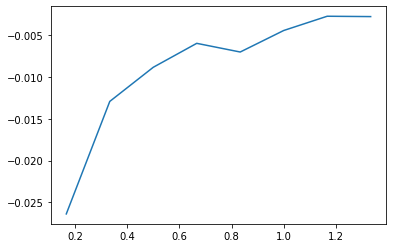

In [6]:
plot_bootstrapped_curve(b)

# Interactive Plots using ipywidgets

For documentation see https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html

In [7]:
from ipywidgets import interact

In [8]:
@interact(libor=(-2, 10, 0.001), tenor=(0, 2, 1/12.))
def g(libor=-0.8796091880796369, tenor=0.5):
    fras2L = bootstrapping['fras2L'].copy()
    fras2L['rate1'] = libor / 100
    b = bootstrap(bootstrapping['fras1'], fras2L, bootstrapping['fras3'], tenor)
    plot_bootstrapped_curve(b)

interactive(children=(FloatSlider(value=-0.879609188079637, description='libor', max=10.0, min=-2.0, step=0.00…